# 12. Machine learning techniques

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/ML_in_practice

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 9.20 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/ML_in_practice


In [2]:
import random as rd
rd.seed(0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [4]:
# use pandas to read './titanic.csv'
Data = pd.read_csv("/content/titanic.csv")
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Next, we can explore the dataset.

In [5]:
# Use pandas to examine some info of the datase

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## The column 'Cabin' has too many nulls , so lets drop it

In [6]:
Data.drop(columns=['Cabin'],inplace = True)

In [7]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

# Other columns such as Age or Embarked are missing some values, but they can still be useful.

# For the age column, let's fill in the missing values with the median of all ages.

# For the Embarked column, let's fill in the missing values with the mean of data

In [8]:
Data.Age.median()

28.0

In [9]:
Data.Age.mean()

29.69911764705882

In [10]:
Data.Age.fillna(Data.Age.median(),inplace = True)

In [11]:
Data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
Data.Embarked.fillna(Data.Embarked.mean,inplace = True)

In [13]:
Data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Now lets move to visualaization part

[38.70967742 59.80392157 67.50629723 56.28742515 61.79775281 58.33333333
 68.42105263 85.71428571]


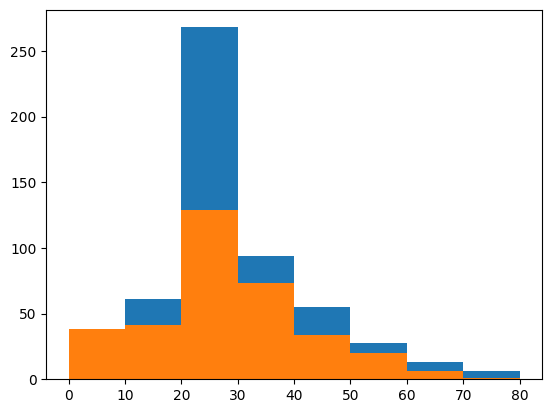

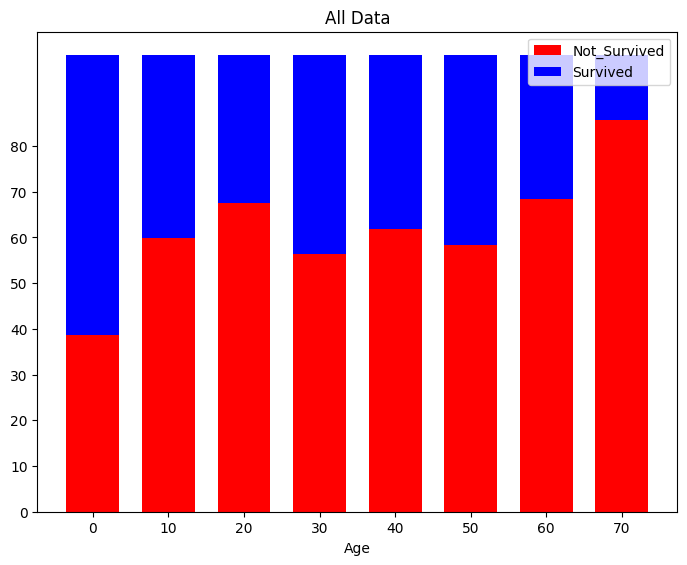

<ipython-input-14-b5f65016ac37>:30: RuntimeWarning: invalid value encountered in true_divide
  stacked_data = 100*values /values.sum(axis=0)


[36.66666667 24.44444444 29.6        16.66666667 31.25       11.11111111
  0.                 nan]


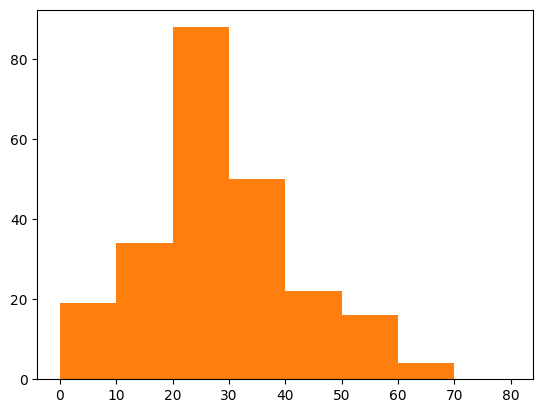

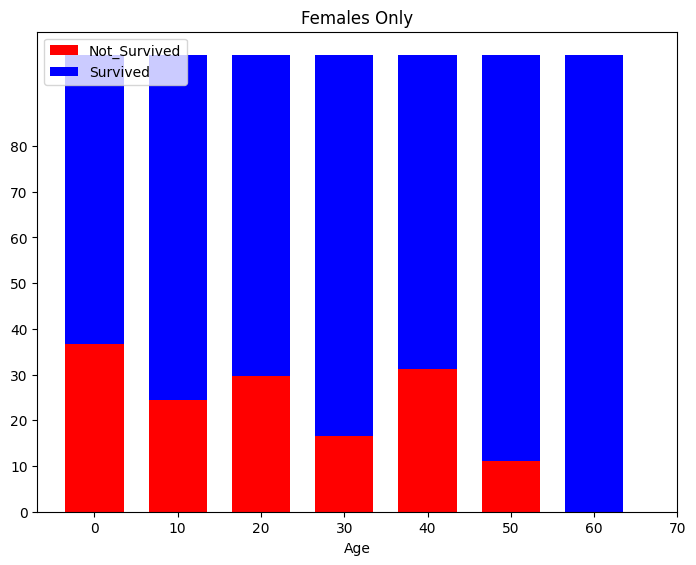

[40.625      87.71929825 84.92647059 78.5046729  78.94736842 86.66666667
 86.66666667 85.71428571]


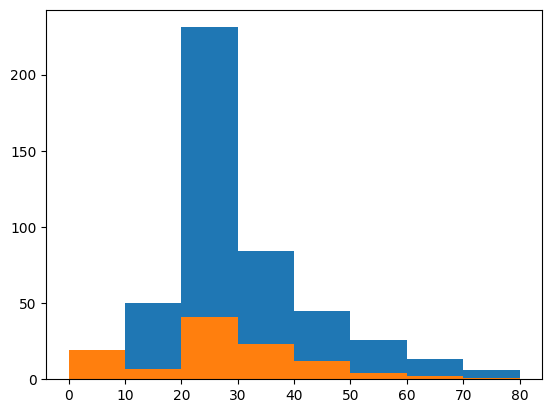

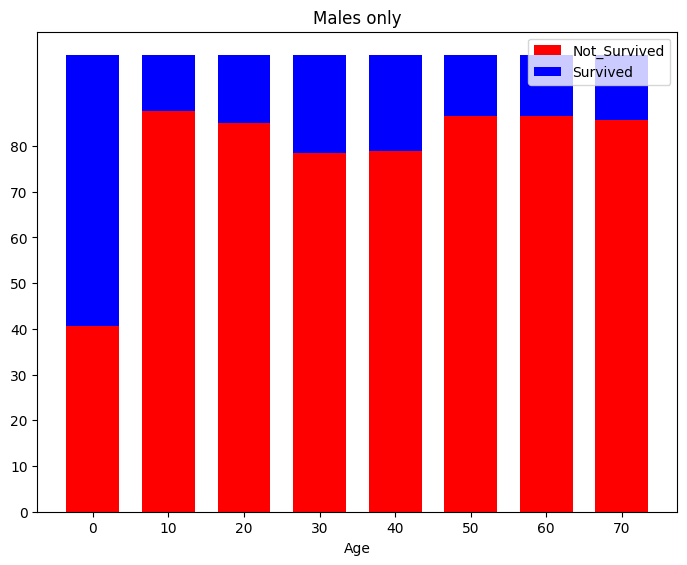

In [14]:
# visulaization
a=Data.where(Data["Survived"]==0)[["Age","Survived"]]
b=Data.where(Data["Survived"]==1)[["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()


a=Data.loc[(Data["Survived"]==0) & (Data["Sex"]=="female"),["Age","Survived"]]
b=Data.loc[(Data["Survived"]==1) & (Data["Sex"]=="female"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

a=Data.loc[(Data["Survived"]==0) & (Data["Sex"]=="male"),["Age","Survived"]]
b=Data.loc[(Data["Survived"]==1) & (Data["Sex"]=="male"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()



### 12.2.3 Saving our data for the future

In [15]:
# save the clean dataset to './clean_titanic_data.csv'
Data.to_csv("caleaned titanic.csv",index = None)

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [16]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(preprocessed_data[['Sex','Embarked','Pclass']]).toarray()
encoded_data = pd.DataFrame(encoded_data , columns = encoder.get_feature_names_out())
print(encoded_data)





# Use pandas method .get_dummies() to get the one hot encoding of “embarked”, “pclass” and “gender”



# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns





     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Embarked_U  \
0           0.0       1.0         0.0         0.0         1.0         0.0   
1           1.0       0.0         1.0         0.0         0.0         0.0   
2           1.0       0.0         0.0         0.0         1.0         0.0   
3           1.0       0.0         0.0         0.0         1.0         0.0   
4           0.0       1.0         0.0         0.0         1.0         0.0   
..          ...       ...         ...         ...         ...         ...   
886         0.0       1.0         0.0         0.0         1.0         0.0   
887         1.0       0.0         0.0         0.0         1.0         0.0   
888         1.0       0.0         0.0         0.0         1.0         0.0   
889         0.0       1.0         1.0         0.0         0.0         0.0   
890         0.0       1.0         0.0         1.0         0.0         0.0   

     Pclass_1  Pclass_2  Pclass_3  
0         0.0       0.0       1.0  
1  

In [18]:
preprocessed_data = pd.concat([preprocessed_data,encoded_data], axis = 1)

In [19]:
preprocessed_data = preprocessed_data.drop(columns = ['Sex','Embarked','Pclass'])

### 12.3.2 Binning

In [20]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Use .cut() method to make bins from the age column

categorized_age = pd.cut(preprocessed_data.Age , bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)
preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,"(30, 40]"
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"(30, 40]"
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"(20, 30]"
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"(10, 20]"
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,"(20, 30]"


In [21]:
# Use pandas method .get_dummies() to get the one hot encoding of “Categorized_age”
# Use pandas method .drop() to remove the old column and method .concat() to add the new columns
preprocessed_data_Age = pd.get_dummies(preprocessed_data['Categorized_age'],prefix = 'Categorized_age')
preprocessed_data = pd.concat([preprocessed_data,preprocessed_data_Age],axis=1)
preprocessed_data.drop(columns = ['Categorized_age'],inplace = True)

preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1.0,0.0,1.0,...,0.0,0.0,0,0,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1.0,0.0,...,0.0,1.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.0,1.0,0.0,...,1.0,0.0,0,0,1,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,1.0,0.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,1.0,0.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,0.0,1.0,1.0,...,0.0,0.0,0,0,1,0,0,0,0,0


### 12.3.4 Feature selection

In [22]:
# drop these columns['Name', 'Ticket', 'PassengerId']
preprocessed_data.drop(columns = ['Name', 'Ticket', 'PassengerId'],inplace = True)


preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,0,1,0,0,0,0


### 12.3.5 Saving for future use

In [23]:
preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [24]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,0,1,0,0,0,0


### 12.4.1 Features-labels split and train-validation split

In [25]:
# drop ["Survived"] column and save that to features
features = data.drop(["Survived"], axis = 1)

# save the ["Survived"] column to labels
labels = data["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features,labels,test_size = 0.4,random_state=100)

In [28]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test =train_test_split(features,labels,test_size = 0.5,random_state=100)

In [29]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
445
446
534
445
446


### 12.4.2 Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [30]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

DecisionTreeClassifier()

In [32]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(features_train, labels_train)

SVC()

In [33]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestClassifier

rf_model =RandomForestClassifier()
rf_model.fit(features_train, labels_train)

RandomForestClassifier()

In [34]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

GradientBoostingClassifier()

In [35]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)

AdaBoostClassifier()

### 12.4.3 Evaluating the models

#### Accuracy

In [36]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Logistic regression:",lr_model.score(features_validation,labels_validation) )
print("Decision tree:", dt_model.score(features_validation,labels_validation))
print("SVM:",svm_model.score(features_validation,labels_validation) )
print("Random forest:", rf_model.score(features_validation,labels_validation))
print("Gradient boosting:",gb_model.score(features_validation,labels_validation) )
print("AdaBoost:",ab_model.score(features_validation,labels_validation) )

Scores of the models
Logistic regression: 0.8292134831460675
Decision tree: 0.9617977528089887
SVM: 0.6719101123595506
Random forest: 0.9573033707865168
Gradient boosting: 0.903370786516854
AdaBoost: 0.8404494382022472


#### F1-score

In [37]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score

print("F1-scores of the models:")
lr_predicted_labels = lr_model.predict(features_validation)
print("Logistic regression:",f1_score(labels_validation,lr_predicted_labels) )


dt_predicted_labels = dt_model.predict(features_validation)
print("Decision tree:", f1_score(labels_validation,dt_predicted_labels))


svm_predicted_labels = svm_model.predict(features_validation)
print("SVM:", f1_score(labels_validation,svm_predicted_labels))


rf_predicted_labels = rf_model.predict(features_validation)
print("Random forest:", f1_score(labels_validation,rf_predicted_labels))

gb_predicted_labels = gb_model.predict(features_validation)
print("Gradient boosting:",f1_score(labels_validation,gb_predicted_labels) )

ab_predicted_labels = ab_model.predict(features_validation)
print("AdaBoost:", f1_score(labels_validation,ab_predicted_labels))

F1-scores of the models:
Logistic regression: 0.7414965986394559
Decision tree: 0.9442622950819672
SVM: 0.34821428571428575
Random forest: 0.939297124600639
Gradient boosting: 0.8580858085808581
AdaBoost: 0.7687296416938111


### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [40]:
# print accuracy of gradient boost model on testing data

print("Random Forest accuracy = ",rf_model.score(features_test,labels_test))
print("Gradient Boosting accuracy = ",gb_model.score(features_test,labels_test))
print("Decision Tree accuracy = ",dt_model.score(features_test,labels_test))

Random Forest accuracy =  0.827354260089686
Gradient Boosting accuracy =  0.8340807174887892
Decision Tree accuracy =  0.820627802690583


In [41]:
# print F1-score of gradient boost model on testing data
rf_predicted_labels = rf_model.predict(features_test)
print("Random forest:", f1_score(labels_test,rf_predicted_labels))

gb_predicted_labels = gb_model.predict(features_test)
print("Gradient boosting:",f1_score(labels_test,gb_predicted_labels) )

dt_predicted_labels = dt_model.predict(features_test)
print("Decision tree:", f1_score(labels_test,dt_predicted_labels))

Random forest: 0.781869688385269
Gradient boosting: 0.7848837209302325
Decision tree: 0.7727272727272727


# 12.5 Grid search

In [43]:
from sklearn.model_selection import GridSearchCV

In [46]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
# use gridsearch to find the best hyperparameters
svm = SVC()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
svm_gs.fit(features_train,labels_train)

# git the best model
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.8471910112359551

In [47]:
svm_winner

SVC(C=10, gamma=0.01)

# 12.6 Cross validation

In [48]:
# print the k-fold cross validation output
svm_gs.cv_results_

{'mean_fit_time': array([0.05142927, 0.0282918 , 0.02428465, 0.02906899, 0.02168412,
        0.0190362 , 0.01904521, 0.02059536, 0.03744893, 0.02287674,
        0.02180142, 0.04027319, 0.06470475, 0.03887448, 0.03923187,
        0.02138309, 0.03965836, 0.03082848, 0.02762227, 0.02540469,
        0.0475894 , 0.06983805, 0.05234694, 0.06164098, 0.05416932]),
 'std_fit_time': array([0.01137486, 0.01266644, 0.00702503, 0.01216511, 0.00269858,
        0.00231095, 0.00150415, 0.00139962, 0.01225282, 0.00252128,
        0.00295258, 0.00649451, 0.0129426 , 0.0085961 , 0.02190687,
        0.00112425, 0.01636414, 0.00809513, 0.00439643, 0.00595706,
        0.01335545, 0.00969792, 0.00602954, 0.0118048 , 0.01322607]),
 'mean_score_time': array([0.01842227, 0.01222539, 0.01140938, 0.0112215 , 0.00945401,
        0.00848289, 0.00983467, 0.00926991, 0.01503668, 0.01044378,
        0.01124592, 0.01123238, 0.02598305, 0.01573272, 0.0137229 ,
        0.00819564, 0.01264701, 0.01042833, 0.01371675, 0.00

# 12.7 Save the model

In [49]:
from sklearn.utils.validation import joblib
from joblib import dump
# use joblib to save the model
dump(svm_gs,'model.joblib')

['model.joblib']